In [11]:
from IPython.core.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# 1. Read data

 Reading the data and selecting right columns.

In [12]:
data = pd.read_csv("C:/Users/Admin/Desktop/Machine Learning/News-aggregator.csv")
data.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.394470e+12
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.394470e+12
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.394470e+12


In [20]:
X_raw, y = data['TITLE'], data['CATEGORY']

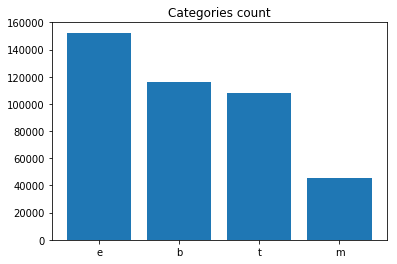

In [14]:
value_counts = dict(y.value_counts())
targets_labels = value_counts.keys()
ind = range(len(targets_labels))
plt.bar(ind, value_counts.values())
plt.title("Categories count")
plt.xticks(ind, targets_labels)
plt.show()

# 2. Prepare data

## 2.1. Vectorizing the data

We use a vector representation of documents (called a "bag of words" model). The document is represented in the form of a vector, whose dimension is equal to the number of all available words. Each word corresponds to one dimension, if the word is present in the document, the vector has a corresponding value on that dimension.
In the basic implementation, this is the number of occurrences of a given word in a document (CountVectorizer in sklearn).
Below I am using an enhanced version of this model (TfidfVectorizer) which, thanks to the TF-IDF factor, also takes into account the relevance of the word. This factor is based on the assumption that the words appearing in many different documents are less important than those that appear in fewer numbers.

In [15]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_raw)

## 2.1. Spliting data into training and test set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_test

280241    e
96315     b
280410    e
284975    e
379072    m
233281    e
77308     t
363221    e
247498    b
176734    t
235116    t
108461    t
209936    e
200980    t
300052    e
337562    e
11323     e
315686    t
270249    e
368705    e
152987    t
278766    e
341785    e
302113    b
118161    e
360910    e
262103    m
183295    e
211197    m
291065    t
         ..
200316    b
364482    t
134350    e
39773     e
48615     t
401014    b
177873    e
145303    e
222185    e
145499    e
313888    m
285312    m
23703     m
104454    m
413873    t
182463    e
303683    e
88344     t
341194    t
66142     b
129864    e
104787    b
125320    t
358529    e
388292    t
341890    e
381669    e
381161    e
354773    e
349255    b
Name: CATEGORY, Length: 105605, dtype: object

# 3. Training model

I'm using LinearSVC with is a Support Vector Classification model with linear kernel. I've tried using other kernels, but it takes to long to train, while this still gives a sufficient results. Suppor Vector Machines algorithms works well with high dimension data (like text documents).

We could have use any other popular, classification algorithm like LogisticRegression, RandomForest, GaussianNaiveBayer or MultipleLayerPerceptron. Or even a deep learning alogrithm, e.g. CNN with word embedding layer tends to get really good results for text classification.

In [7]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

# 4. Results

## 4.1. Classification metrics

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          b       0.93      0.94      0.93     29117
          e       0.98      0.98      0.98     37988
          m       0.96      0.94      0.95     11319
          t       0.93      0.93      0.93     27181

avg / total       0.95      0.95      0.95    105605



## 4.2. Confusion matrix

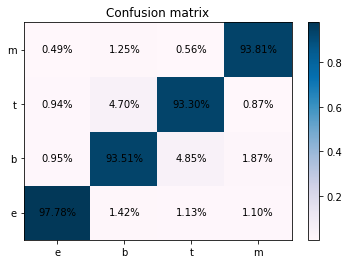

In [10]:
def plot_confusion_matrix(y_true, y_pred, targets_labels=None):
    targets_labels = list(targets_labels)
    if not targets_labels:
        targets_labels = list(set(y_true))
    num_classes = len(targets_labels)
    cdata = confusion_matrix(y_true, y_pred, labels=targets_labels)
    cdata = cdata / cdata.sum(axis=1).astype(float)
    heatmap = plt.pcolor(cdata, cmap="PuBu")
    plt.title("Confusion matrix")
    plt.colorbar(heatmap)
    for y in range(cdata.shape[0]):
        for x in range(cdata.shape[1]):
            plt.text(x + 0.5, y + 0.5, '{0:.2f}%'.format((cdata[y, x] * 100)),
                     horizontalalignment='center',
                     verticalalignment='center',
                     )

    tick_marks = np.arange(num_classes) + 0.5
    plt.xticks(tick_marks, targets_labels)
    plt.yticks(tick_marks, targets_labels)
    plt.show()
    
plot_confusion_matrix(y_test, y_pred, targets_labels)